In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras 

In [21]:
dataSet = pd.read_csv("/kaggle/input/weather-dataset/weatherHistory.csv")
dataSet.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
dataSet.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


In [22]:
dataSet.drop(['Formatted Date'],axis = 1 , inplace = True)
dataSet.drop(['Daily Summary'],axis = 1 , inplace = True)
dataSet.drop(['Summary'],axis = 1 , inplace = True)
dataSet.drop(['Visibility (km)'],axis = 1 , inplace = True)
dataSet.drop(['Wind Bearing (degrees)'],axis = 1 , inplace = True)
dataSet.drop(['Loud Cover'],axis = 1 , inplace = True)

dataSet.replace(to_replace= np.nan, value=0, inplace=True)
dataSet.replace(to_replace="rain", value=1, inplace=True)
dataSet.replace(to_replace="snow", value=2, inplace=True)
dataSet.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
0,1,9.472222,7.388889,0.89,14.1197,1015.13
1,1,9.355556,7.227778,0.86,14.2646,1015.63
2,1,9.377778,9.377778,0.89,3.9284,1015.94
3,1,8.288889,5.944444,0.83,14.1036,1016.41
4,1,8.755556,6.977778,0.83,11.0446,1016.51


In [48]:
dataSet.describe()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,1.105699,11.932678,10.855029,0.734899,10.810640,1003.235956
std,0.324420,9.551546,10.696847,0.195473,6.913571,116.969906
min,0.000000,-21.822222,-27.716667,0.000000,0.000000,0.000000
25%,1.000000,4.688889,2.311111,0.600000,5.828200,1011.900000
50%,1.000000,12.000000,12.000000,0.780000,9.965900,1016.450000
75%,1.000000,18.838889,18.838889,0.890000,14.135800,1021.090000
max,2.000000,39.905556,39.344444,1.000000,63.852600,1046.380000


<AxesSubplot:>

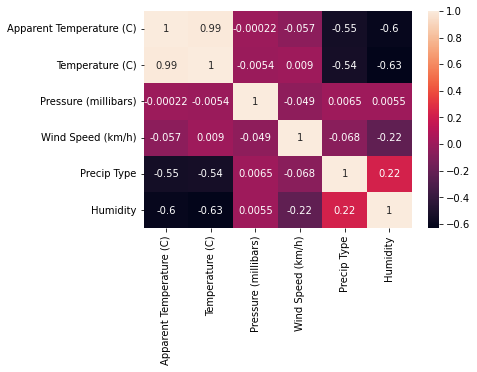

In [49]:
c = dataSet.corr().nlargest(6,'Apparent Temperature (C)')['Apparent Temperature (C)'].index
plt.figure()
seaborn.heatmap(dataSet[c].corr(),annot=True)

In [23]:
target  = dataSet['Apparent Temperature (C)']
print(target[1])

7.227777777777776


In [24]:
dataSet.drop(['Apparent Temperature (C)'],axis = 1 , inplace = True)

In [25]:
scaler = MinMaxScaler()
dataSet[['Precip Type','Humidity','Wind Speed (km/h)','Pressure (millibars)']] = scaler.fit_transform(dataSet[['Precip Type','Humidity','Wind Speed (km/h)','Pressure (millibars)']])
dataSet.head()

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
0,0.5,9.472222,0.89,0.221130,0.970135
1,0.5,9.355556,0.86,0.223399,0.970613
2,0.5,9.377778,0.89,0.061523,0.970909
3,0.5,8.288889,0.83,0.220877,0.971358
4,0.5,8.755556,0.83,0.172970,0.971454


In [26]:
features = []
for index, row in dataSet.iterrows():
    t = []
    for i in row:
        t.append(i)
    features.append(t)

In [27]:
print(features[0])

[0.5, 9.47222222222222, 0.89, 0.2211296016137166, 0.9701351325522276]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1)

In [29]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [30]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [31]:
X_val = X_train[:15000]
y_val = y_train[:15000]
X_train = X_train[15000:]
y_train = y_train[15000:]

In [32]:
print(X_train.shape)
print(X_test.shape)

(71807, 1, 5)
(9646, 1, 5)


In [79]:
temp_model = keras.Sequential()
temp_model.add(keras.layers.Bidirectional(keras.layers.LSTM(64,input_shape=X_train.shape)))
temp_model.add(keras.layers.Dense(256, activation="relu"))
temp_model.add(keras.layers.Dense(256, activation="relu"))
temp_model.add(keras.layers.Dense(128, activation="relu"))
temp_model.add(keras.layers.Dense(64, activation="relu"))
temp_model.add(keras.layers.Dense(32, activation="relu"))
temp_model.add(keras.layers.Dense(16, activation="relu"))
temp_model.add(keras.layers.Dense(1, activation="linear"))

In [59]:
earlystopping = keras.callbacks.EarlyStopping(monitor="val_loss",mode ="min",patience = 10)

In [80]:
temp_model.compile(loss='mean_absolute_error', optimizer='adam', 
                   metrics=['mean_absolute_error'])
fitModel = temp_model.fit(X_train, y_train, epochs=95, batch_size=450, 
                validation_data=(X_val, y_val), verbose=1, callbacks =[earlystopping])
results = temp_model.evaluate(X_test, y_test)

Epoch 1/95
160/160 [==============================] - 7s 18ms/step - loss: 2.8493 - mean_absolute_error: 2.8493 - val_loss: 0.8225 - val_mean_absolute_error: 0.8225
Epoch 2/95
160/160 [==============================] - 2s 13ms/step - loss: 0.4896 - mean_absolute_error: 0.4896 - val_loss: 0.3575 - val_mean_absolute_error: 0.3575
Epoch 3/95
160/160 [==============================] - 2s 13ms/step - loss: 0.4187 - mean_absolute_error: 0.4187 - val_loss: 0.2219 - val_mean_absolute_error: 0.2219
Epoch 4/95
160/160 [==============================] - 2s 13ms/step - loss: 0.2843 - mean_absolute_error: 0.2843 - val_loss: 0.2633 - val_mean_absolute_error: 0.2633
Epoch 5/95
160/160 [==============================] - 2s 13ms/step - loss: 0.2650 - mean_absolute_error: 0.2650 - val_loss: 0.2924 - val_mean_absolute_error: 0.2924
Epoch 6/95
160/160 [==============================] - 2s 13ms/step - loss: 0.2683 - mean_absolute_error: 0.2683 - val_loss: 0.3099 - val_mean_absolute_error: 0.3099
Epoch 7/95

In [83]:
for i in range(122,130):
    print("the model Predicted :",temp_model.predict(X_test[i].reshape((1,1,5))))
    print("the actual value : ",y_test[i])

the model Predicted : [[20.030386]]
the actual value :  20.06666666666667
the model Predicted : [[20.89626]]
the actual value :  20.933333333333337
the model Predicted : [[12.264473]]
the actual value :  12.31111111111111
the model Predicted : [[-1.0657854]]
the actual value :  -1.1388888888888893
the model Predicted : [[19.378345]]
the actual value :  19.422222222222217
the model Predicted : [[26.790092]]
the actual value :  26.71111111111111
the model Predicted : [[12.120484]]
the actual value :  12.17777777777778
the model Predicted : [[4.1983275]]
the actual value :  4.155555555555554


In [ ]:
predicted_values = []
for i in X_test:
    predicted_values.append(temp_model.predict(i.reshape((1,1,5))))

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


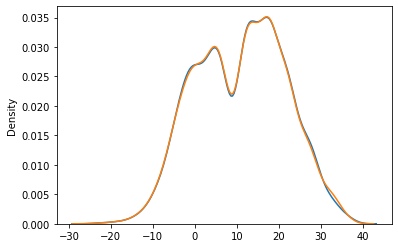

In [54]:
seaborn.distplot(a=y_test, hist=False)
seaborn.distplot(a=predicted_values, hist=False)
plt.show()

In [86]:
model_json = temp_model.to_json()
with open("Mytemp_model.json", "w") as json_file:
        json_file.write(model_json)
temp_model.save_weights("Mytemp_model.h5")
print("Saved model to disk")

Saved model to disk
